# Propagating Monte Carlo Error: Python3
By: Nicholas Chieppa & Ben Donnieq

In [70]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import patches as pltPatch
import matplotlib

# Generate Random Data

In [77]:
xvals = np.linspace(-1, 1, 11) # Project Requirements specify 11 points on -1, 1
def makeFakeData(fn):
    return fn(xvals)+np.random.normal(size=len(xvals))

Below is the funciton that dictates solution behavior

In [81]:
fn1 = lambda x: -2+3.*x 
fn2 = lambda x: 3.

In [82]:
samples = 1000
def createDataSet(fn):
    data = []
    for index in np.arange(samples): # at least 1000 data sets
        x = makeFakeData(fn)
        data.append(np.polyfit(xvals, x, 1))
    return np.array(data), x

fn1Data = createDataSet(fn1)
fn2Data = createDataSet(fn2)
print(fn1Data)

(array([[ 3.52194606, -2.54576447],
       [ 2.9566219 , -2.17527697],
       [ 2.66760631, -2.53241358],
       ...,
       [ 3.91756883, -1.9507554 ],
       [ 3.78243852, -1.76985019],
       [ 2.44553844, -1.93265181]]), array([-4.78058337, -2.71634713, -3.05538708, -3.04219975, -3.53393318,
       -1.31859966, -1.88826105, -1.33736083, -1.2813859 , -0.18174662,
        1.87663465]))


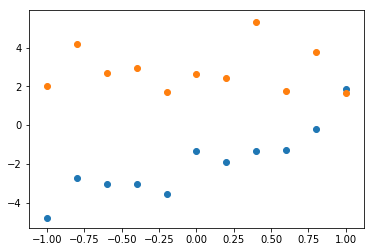

In [83]:
def scatter(data):
    plt.scatter(xvals, data)
scatter(fn1Data[1])
scatter(fn2Data[1])

# Distibution of Linear Fit Coefficients
A linear equation has the general formula f(x)= mx + b.

The first coefficient that the polyfit function generates is the estimate for b and the second coefficient is the estimate for the slope of the function m. 

This equates to C0 = b, C1 = m.

Properties of generated test data with known function: fn = -2 + 3x
Estimated function
f: -2.0 + 2.99 x
C0 = -2.0 ; C1 = 2.99
Correlation coeff: 0.40461938783573476
Covariance of C0, C1 -0.0
Variance of Ck: C0 = 0.09 ; C1 = 0.24

Properties of generated test data with known function: fn = 3
Estimated function
f: 3.01 + 0.0 x
C0 = 3.01 ; C1 = 0.0
Correlation coeff: 0.0
Covariance of C0, C1 0.0
Variance of Ck: C0 = 0.09 ; C1 = 0.23


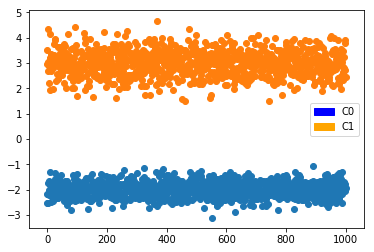

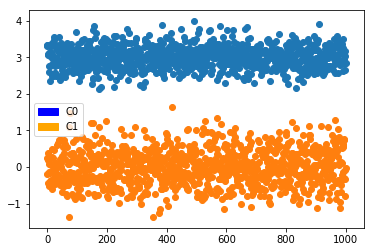

In [98]:
def printProp(data, fig):
    print("Estimated function")
    ck0 = np.round(np.mean(data[0][:,1]), 2)
    ck1 = np.round(np.mean(data[0][:,0]), 2)
    print("f:", ck0, "+", ck1, "x")
    print("C0 =", ck0, "; C1 =", ck1)
    
    ck0var = np.round(np.var(data[0][:,1]), 2)
    ck1var = np.round(np.var(data[0][:,0]), 2)
    plt.figure(fig)
    ck0_leg = pltPatch.Patch(color = 'blue', label='C0')
    ck1_leg = pltPatch.Patch(color = 'orange', label='C1')
    plt.legend(handles=[ck0_leg, ck1_leg])
    
    r = ck1 * np.var(xvals) / np.var(data[1])
    print("Correlation coeff:", r)
    
    covar = np.round(np.cov(data[0][:,1], data[0][:,0])[0][1], 2)
    print("Covariance of C0, C1", covar)
    
    plt.scatter(list(range(samples)), data[0][:,1])
    plt.scatter(list(range(samples)), data[0][:,0])
    
    print("Variance of Ck: C0 =", ck0var, "; C1 =", ck1var)
    
    return ck0, ck1, ck0var, ck1var
    
    
print("Properties of generated test data with known function: fn = -2 + 3x")
fn1prop = printProp(fn1Data, 0)
print()
print("Properties of generated test data with known function: fn = 3")
fn2prop = printProp(fn2Data, 1)

In [102]:
def varfprime(data, values):
    return 

print(varfprime(fn1prop, fn1Data[1]))

-29.587250614024057
